# PCA based Noise Reduction to compare with Autoencoder Architecture

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
#loading mnist dataset
from sklearn.datasets import load_digits
plt.rcParams['figure.figsize'] = [40, 20]
(X_train, y_train), (X_test, y_test)=datasets.mnist.load_data()

In [3]:
print(X_test.shape)

(10000, 28, 28)


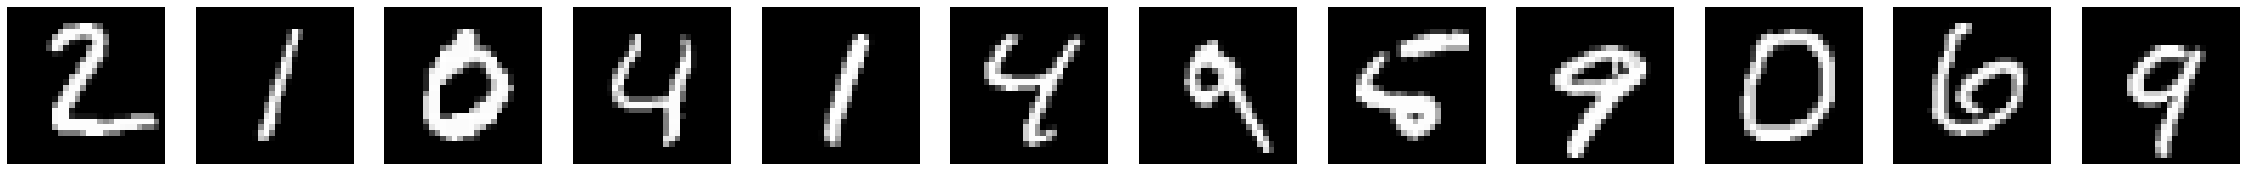

In [4]:
plt.figure()
for i in range(1,13):
    plt.subplot(1,12,i)
    plt.axis('off')
    plt.imshow(X_test[i], cmap='gray')
plt.show()

### Preprocessing and Noise Introduction

In [5]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')/255.
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')/255.
noise_ratio = 0.5
X_train_noisy = X_train + noise_ratio*np.random.normal(loc=0.5, scale=0.7, size=X_train.shape)
X_test_noisy = X_test + noise_ratio*np.random.normal(loc=0.5, scale=0.7, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

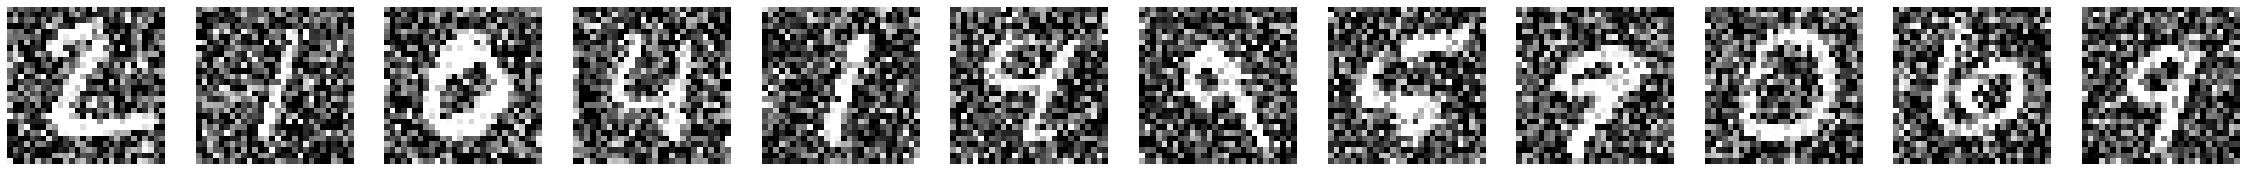

In [7]:
plt.figure()
for i in range(1,13):
    plt.subplot(1,12,i)
    plt.axis('off')
    plt.imshow(X_test_noisy[i].reshape(28,28), cmap='gray')
plt.show()

In [8]:
def using_lib(n):
    '''This function fits the data to a PCA model of n components and then the transformation matrix T is obtained
       X' = TX is the transformed data with reduced dimensions of n. Now we take the inverse transform X'' = TXT' where
       T' is the approximation obtained using inverse PCA.
    '''
    plt
    from sklearn.decomposition import PCA
    pca = PCA(n_components = n)
    pca.fit(X_test_noisy)
    components = pca.transform(X_test_noisy)
    fixed = pca.inverse_transform(components).reshape(10000,28,28)

    # Plot 12 Examples 
    print(f"For N = {n}")
    plt.figure()
    for i in range(1,13):
        plt.subplot(1,12,i)
        plt.axis('off')
        plt.imshow(fixed[i], cmap='gray')
    plt.show()

### We plot few of the outputs for 
- $\verb|no of components = 10, 20, 30... 780|$

Then we visually try to identify where the noise is minimized.

For N = 10


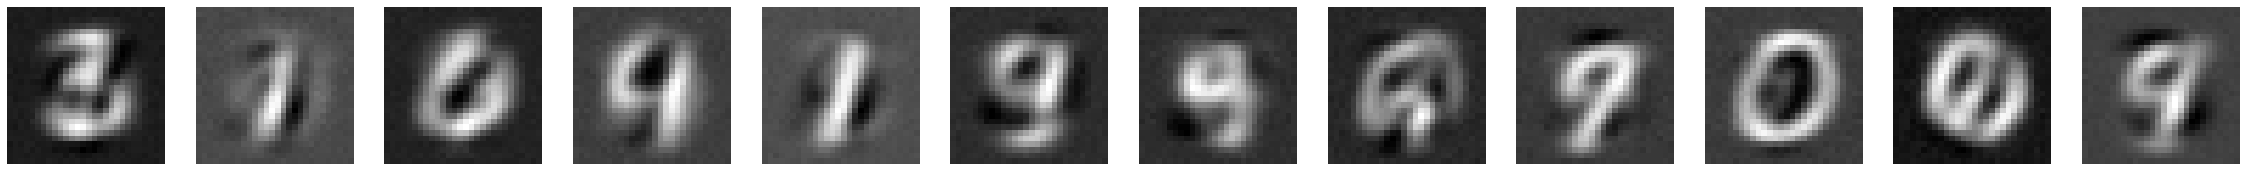

For N = 20


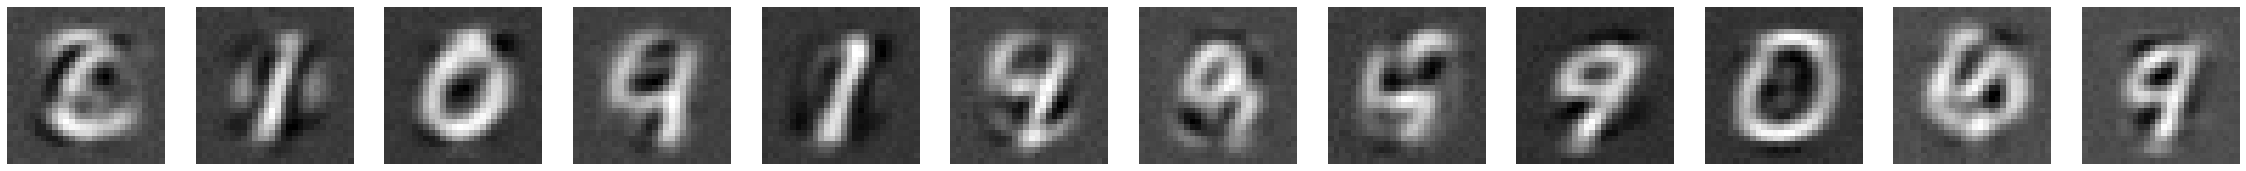

For N = 30


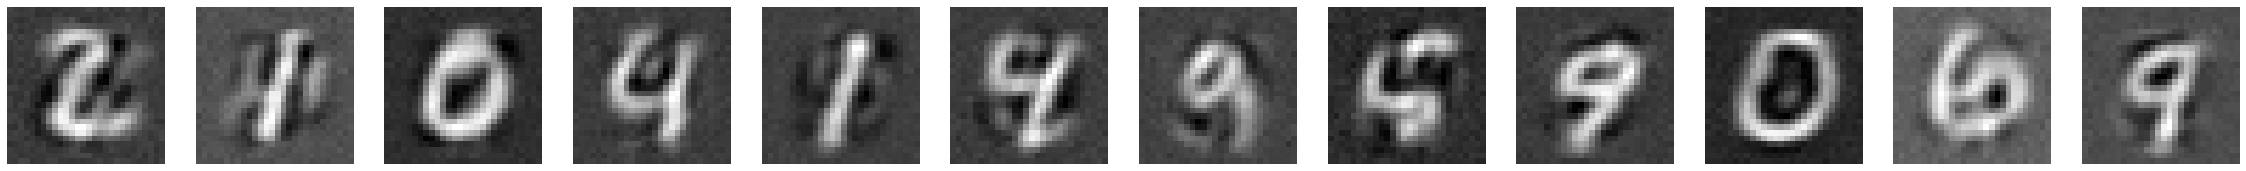

For N = 40


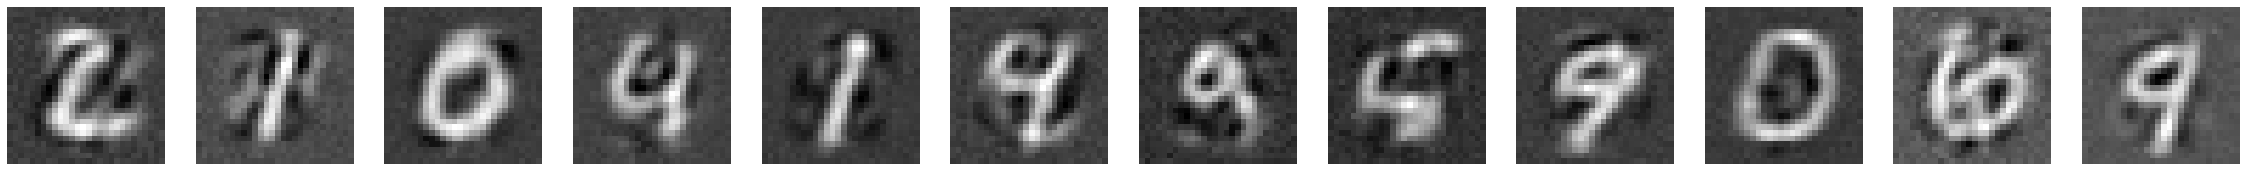

For N = 50


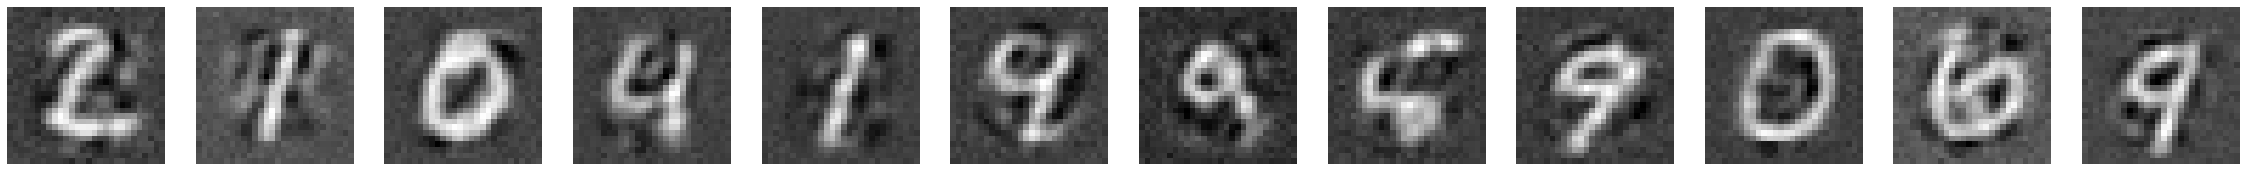

For N = 60


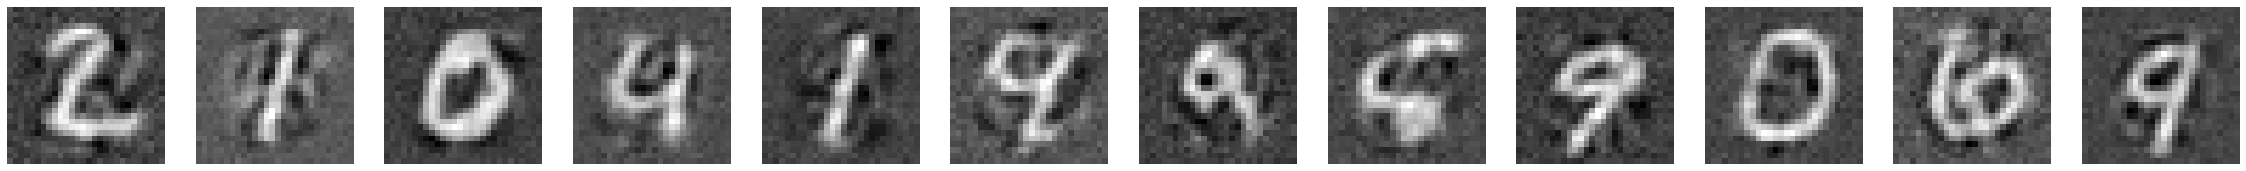

For N = 70


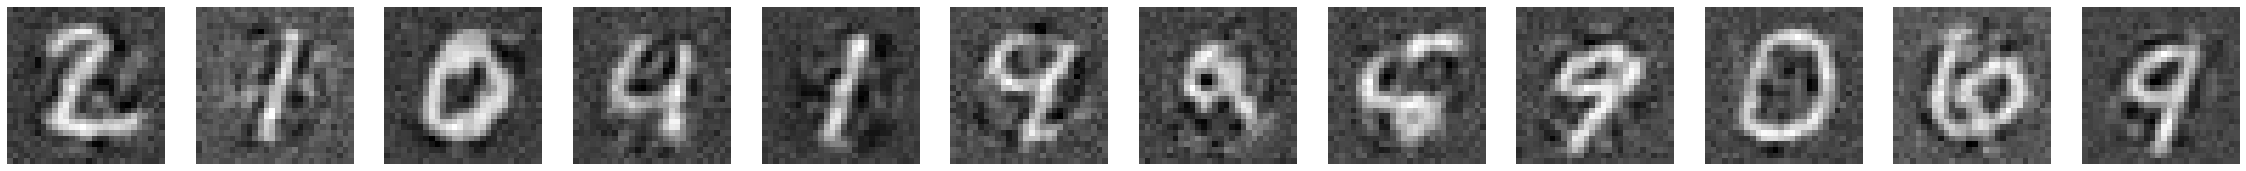

For N = 80


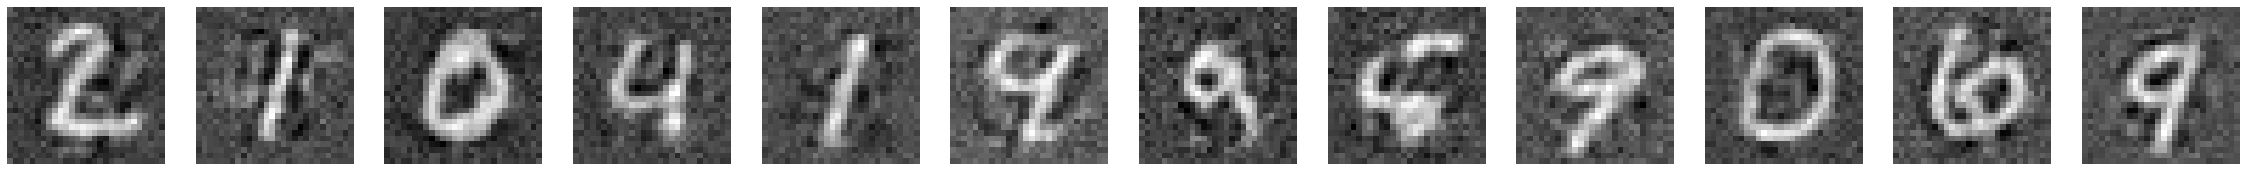

For N = 90


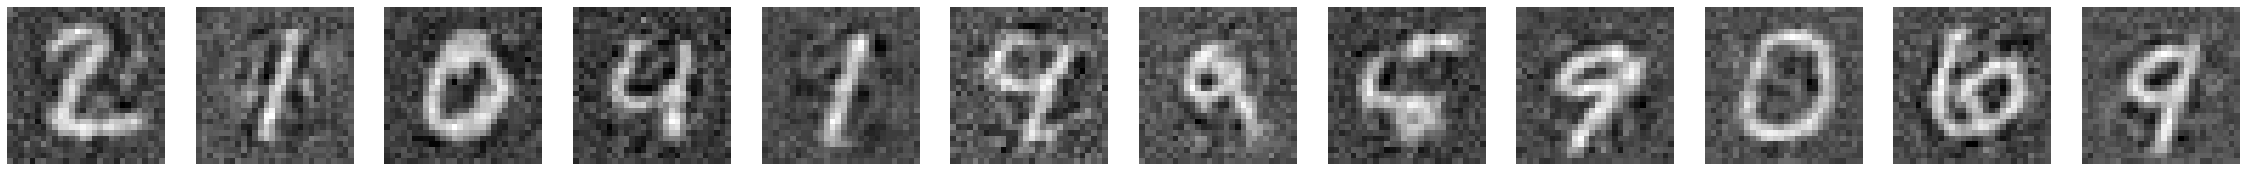

For N = 100


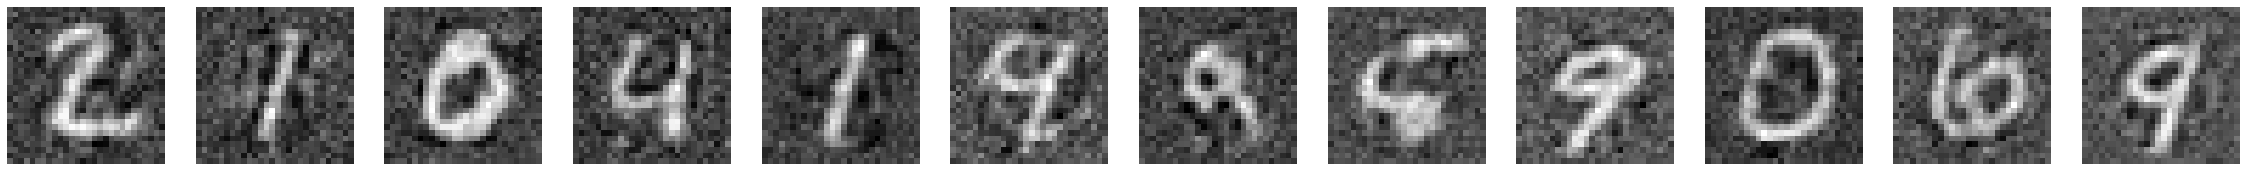

For N = 110


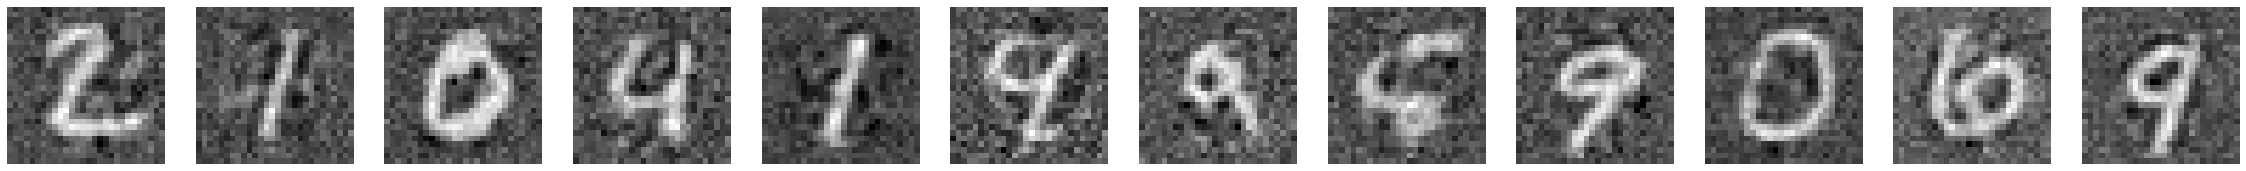

For N = 120


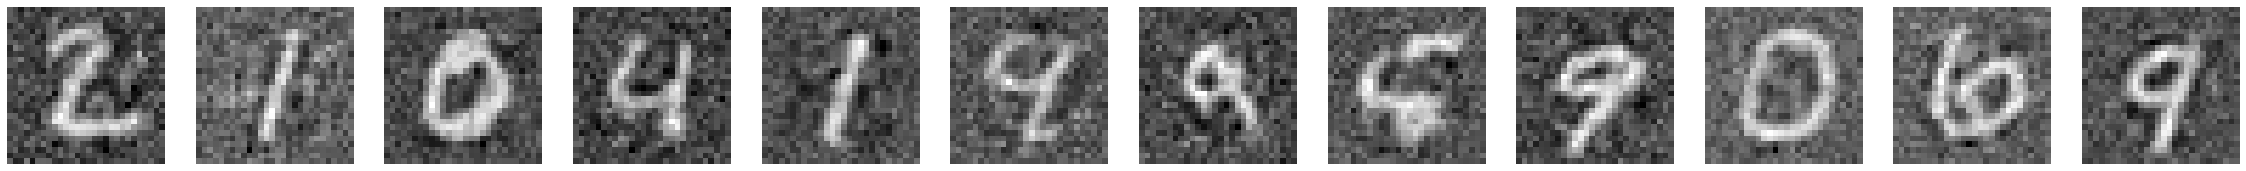

For N = 130


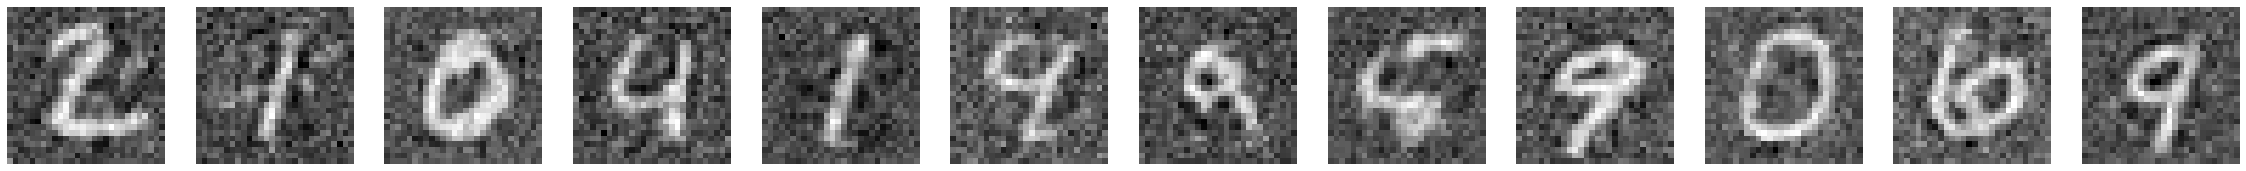

For N = 140


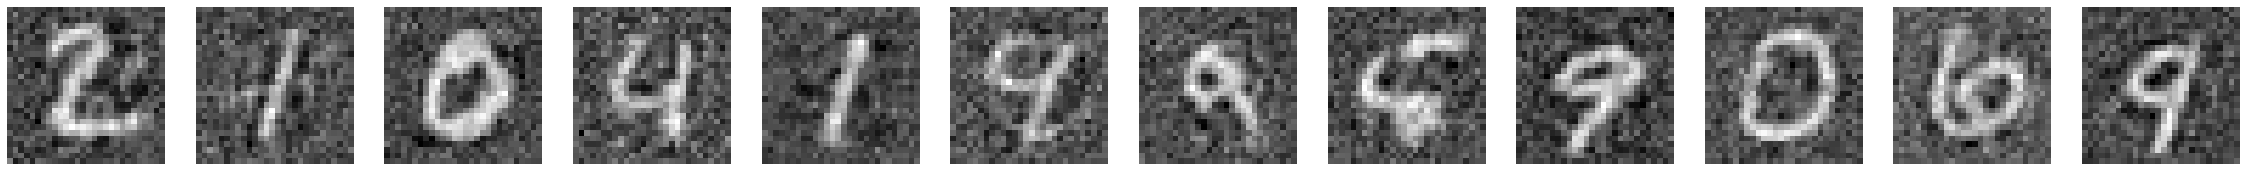

For N = 150


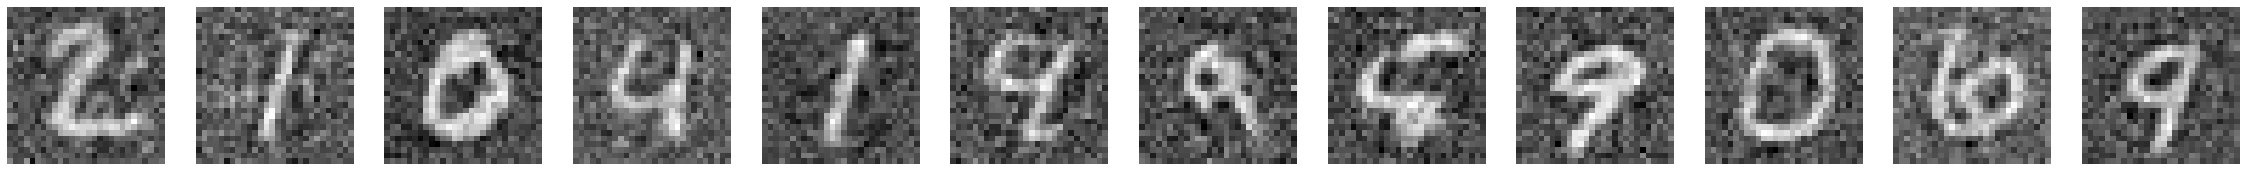

For N = 160


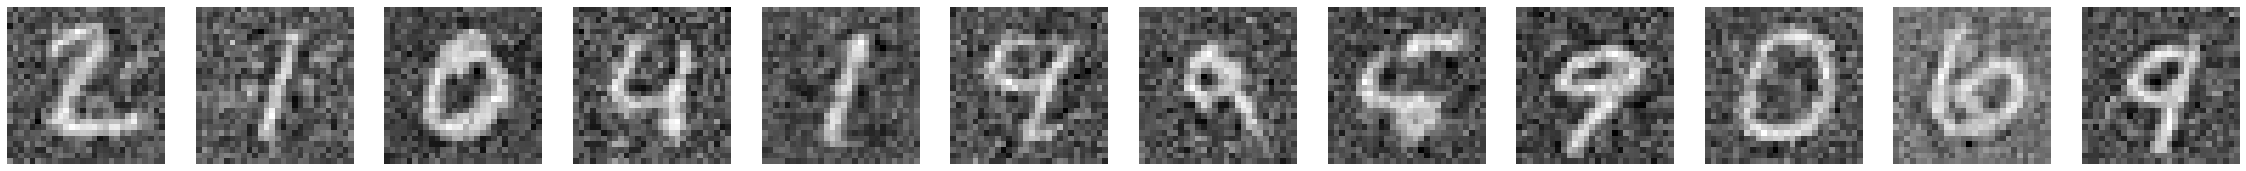

For N = 170


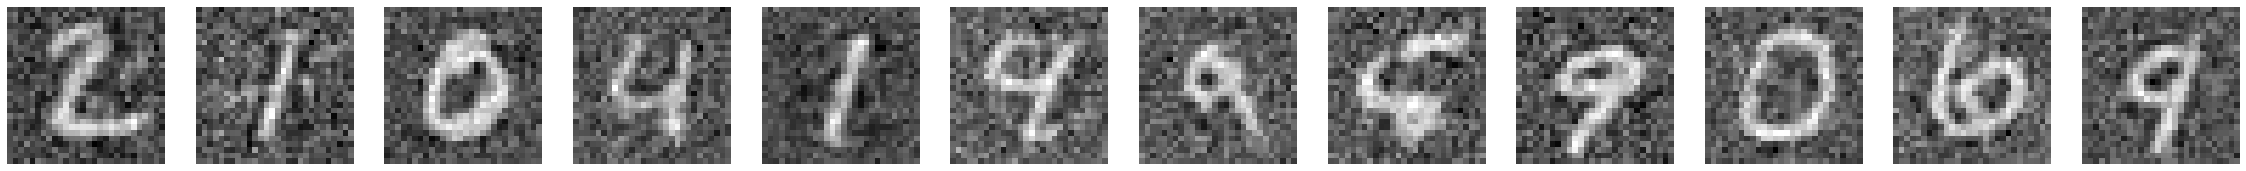

For N = 180


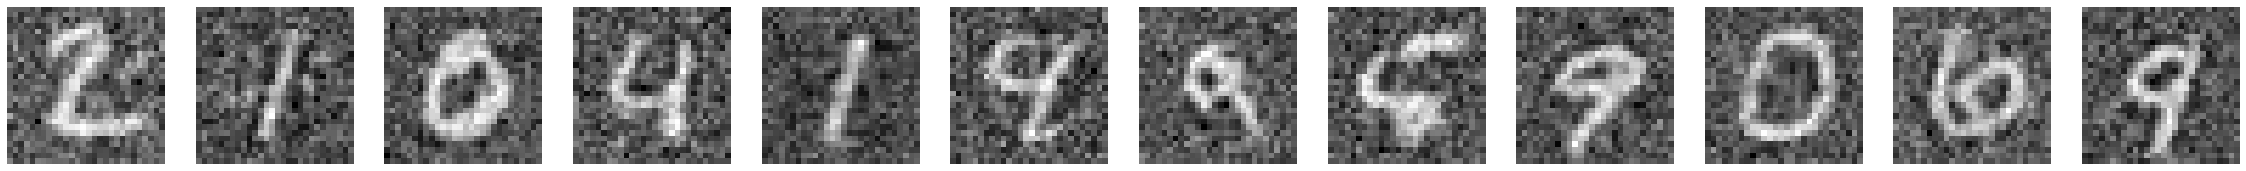

For N = 190


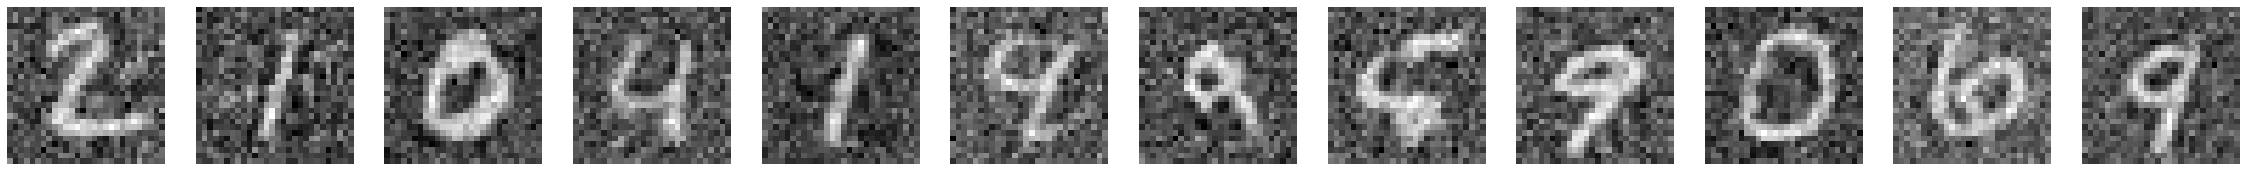

In [10]:
for i in range(10,200,10):
    using_lib(i)

### Inference

We notice that for a value of N = 80 the noise is minimized. But we notice that this isnt as effective as the Autoencoder based Noise Reduction Techniques

### Denoised

For N = 80


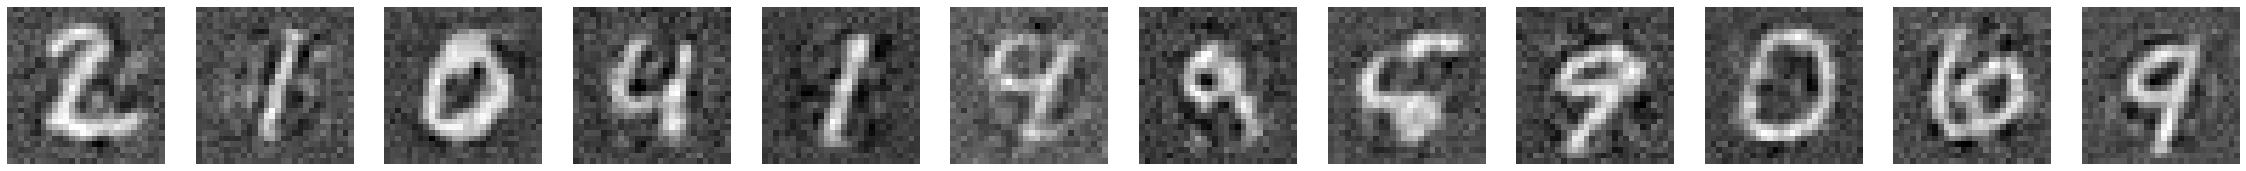

In [12]:
using_lib(80)

# Noisy 

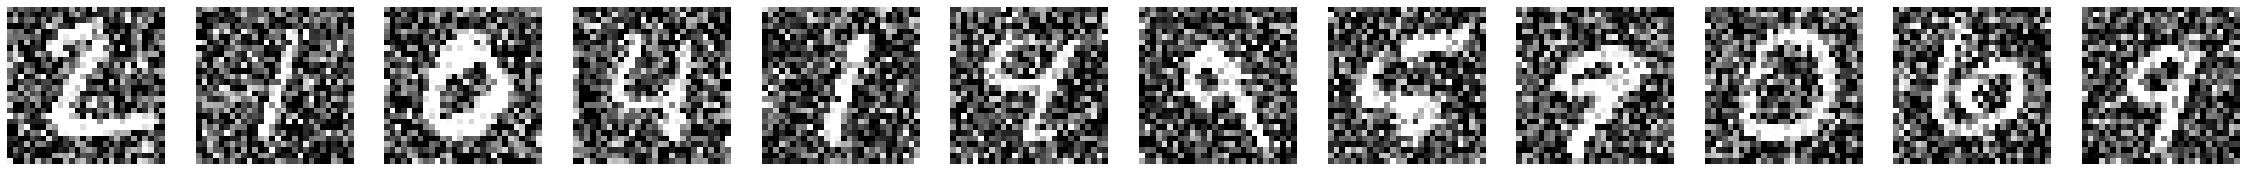

In [13]:
plt.figure()
for i in range(1,13):
    plt.subplot(1,12,i)
    plt.axis('off')
    plt.imshow(X_test_noisy[i].reshape(28,28), cmap='gray')
plt.show()